# Introduction
## About Authur
* I am Masod ul Hassan Ghauri. I am a student of Data science & AI subject.
* LnkDn Profile: https://www.linkedin.com/in/masod-ghauri-914a18334/
* Kaggle Profile: https://www.kaggle.com/masodulhassanghauri
* GitHub Profile: https://github.com/Masod6
## About Dataset
I've download the data from kaggle https://www.kaggle.com/datasets/burayamail/brazilian-e-commerce?select=olist_geolocation_dataset.csv
The Brazilian E-Commerce dataset from Kaggle provides detailed insights into customer behaviors, geolocations, order details, payments, and reviews. The olist_geolocation_dataset.csv file contains geospatial data for locations, which can be used for geographic analysis and other insights. Below is a step-by-step guide to analyzing this dataset in Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore") 

In [2]:
data=pd.read_csv(r'F:\Data Sceince\Data Sets\olist_geolocation_dataset.csv')

In [4]:
data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [9]:
data.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

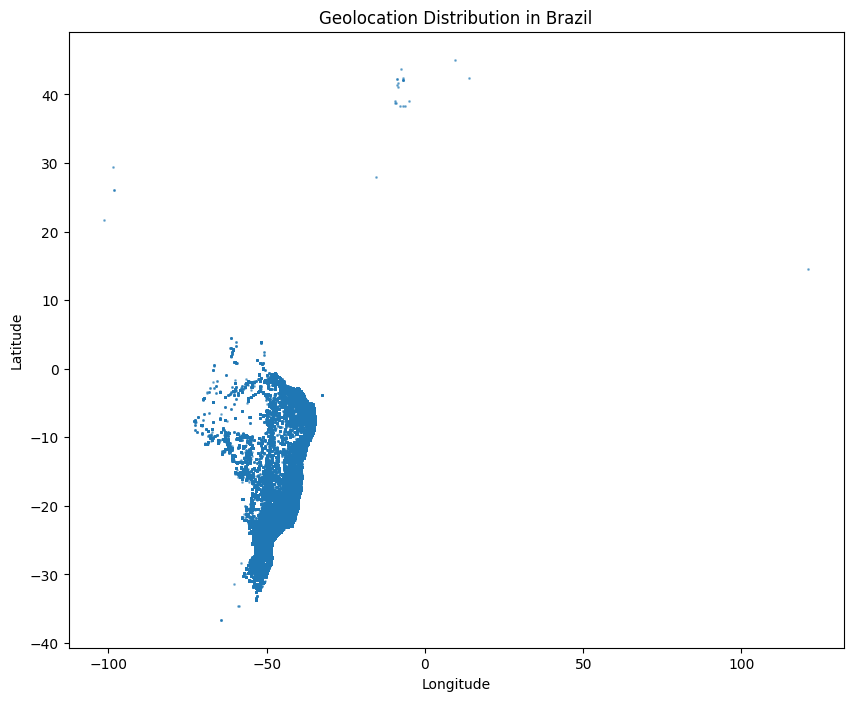

In [10]:
# Scatter plot of all geolocations
plt.figure(figsize=(10, 8))
plt.scatter(data['geolocation_lng'], data['geolocation_lat'], alpha=0.5, s=1)
plt.title('Geolocation Distribution in Brazil')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [11]:
# Count the number of geolocations per city
city_counts = data['geolocation_city'].value_counts()

# Top 10 cities
print("Top 10 cities by geolocation count:\n", city_counts.head(10))

# Count geolocations by state
state_counts = data['geolocation_state'].value_counts()
print("Top states by geolocation count:\n", state_counts)


Top 10 cities by geolocation count:
 geolocation_city
sao paulo                135800
rio de janeiro            62151
belo horizonte            27805
são paulo                 24918
curitiba                  16593
porto alegre              13521
salvador                  11865
guarulhos                 11340
brasilia                  10470
sao bernardo do campo      8112
Name: count, dtype: int64
Top states by geolocation count:
 geolocation_state
SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: count, dtype: int64


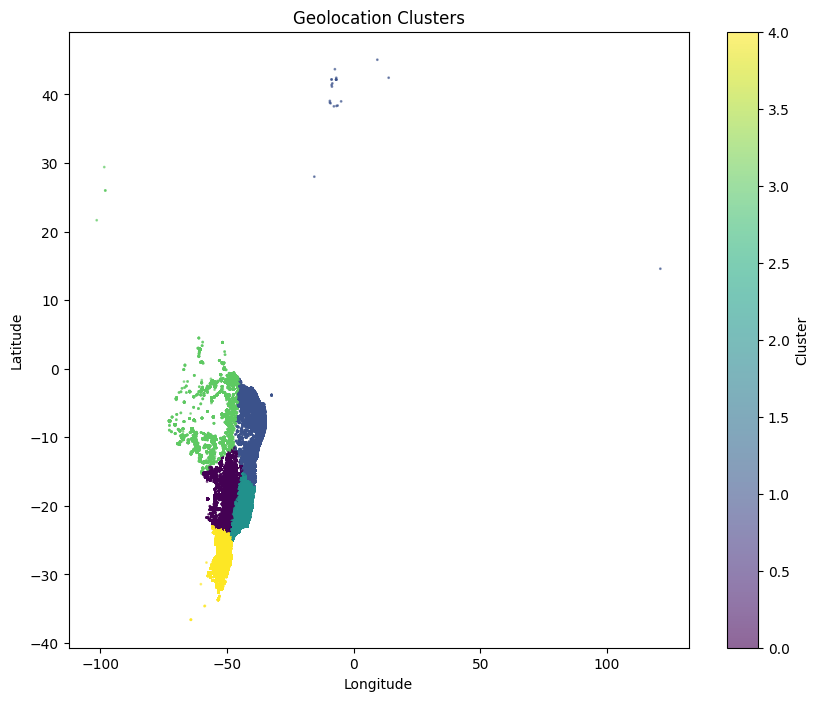

In [12]:
from sklearn.cluster import KMeans

# Prepare data for clustering
coordinates = data[['geolocation_lat', 'geolocation_lng']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(coordinates)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(data['geolocation_lng'], data['geolocation_lat'], c=data['cluster'], cmap='viridis', alpha=0.6, s=1)
plt.title('Geolocation Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


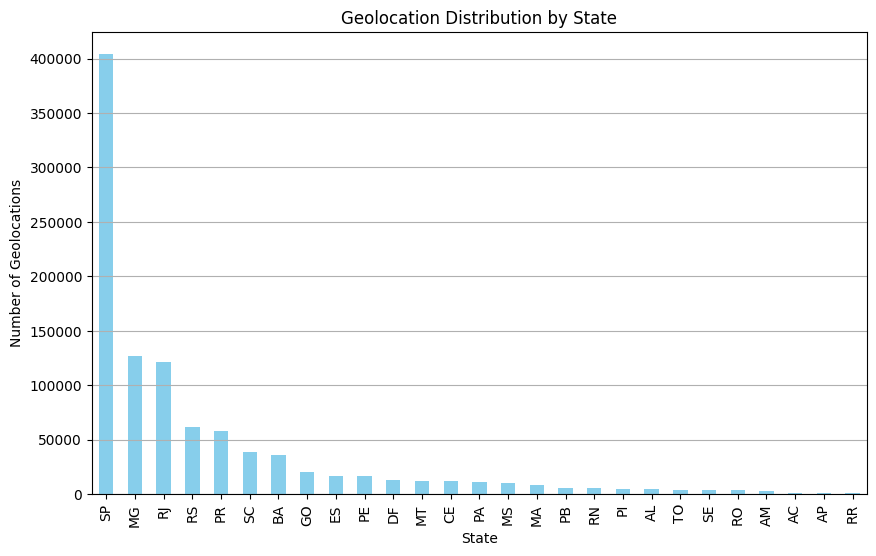

In [13]:
# Plot geolocation distribution by state
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar', color='skyblue')
plt.title('Geolocation Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Geolocations')
plt.grid(axis='y')
plt.show()


In [14]:
pip install geopy

   geolocation_lat  geolocation_lng  distance_to_sp
0       -23.545621       -46.639292        0.816252
1       -23.546081       -46.644820        1.274014
2       -23.546129       -46.642951        1.097939
3       -23.544392       -46.639499        0.926417
4       -23.541578       -46.641607        1.302255


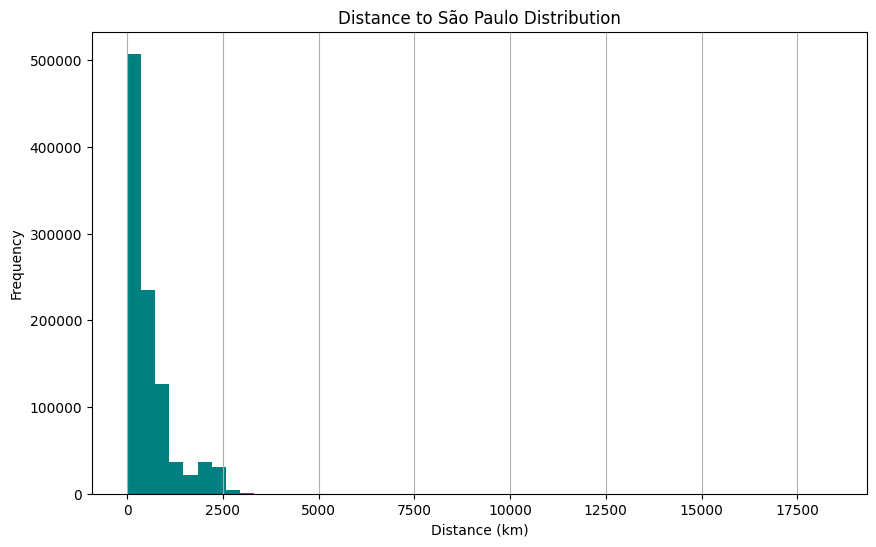

In [16]:
from geopy.distance import geodesic

# Example: Calculate distance from a reference point (e.g., São Paulo)
reference_point = (-23.5505, -46.6333)  # São Paulo coordinates

# Add a distance column
data['distance_to_sp'] = data.apply(
    lambda row: geodesic(reference_point, (row['geolocation_lat'], row['geolocation_lng'])).km, axis=1
)

# Check distances
print(data[['geolocation_lat', 'geolocation_lng', 'distance_to_sp']].head())

# Plot distance distribution
plt.figure(figsize=(10, 6))
data['distance_to_sp'].hist(bins=50, color='teal')
plt.title('Distance to São Paulo Distribution')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()
